### TUBES PCD 
### KELOMPOK 23

In [215]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

cv2 untuk pemrosesan gambar, matplotlib.pyplot digunakan untuk membuat visualisasi data termasuk plot gambar hasil pemrosesan, numpy digunakan untuk manipulasi data numerik, pandas untuk manipulasi dan analisis data tabular, os untuk operasi pada sistem operasi dan math untuk fungsi matematika umum

In [216]:
def process_dataset(dataset_dir):
    data = [] 
    labels = []
    paths = []
    
    for sub_folder in os.listdir(dataset_dir):
        sub_folder_files = os.listdir(os.path.join(dataset_dir, sub_folder))
        for i, filename in enumerate(sub_folder_files):
            
            img_path = os.path.join(dataset_dir, sub_folder, filename)
            img = cv2.imread(img_path)
            rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # grayscale
            # gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
         
            data.append(rgb)
            labels.append(sub_folder)
            paths.append(img_path)
    
    labels = np.array(labels)
    paths = np.array(paths)
    
    return data, labels, paths

Code di atas adalah sebuah fungsi bernama process_dataset yang digunakan untuk memproses dataset gambar pada direktori tertentu.

-data = [], labels = [], paths = []: Membuat list kosong data, labels, dan paths untuk menyimpan data gambar, label, dan path gambar.

-for sub_folder in os.listdir(dataset_dir):: Melakukan iterasi pada setiap sub-folder dalam direktori dataset.

-sub_folder_files = os.listdir(os.path.join(dataset_dir, sub_folder)): Mendapatkan daftar file dalam setiap sub-folder.

-for i, filename in enumerate(sub_folder_files):: Melakukan iterasi pada setiap file dalam sub-folder.

-img_path = os.path.join(dataset_dir, sub_folder, filename): Menggabungkan path direktori dengan nama file untuk mendapatkan path lengkap gambar.

-img = cv2.imread(img_path): Membaca gambar menggunakan OpenCV dan menyimpannya dalam variabel img.

-gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY): Mengubah gambar ke dalam mode grayscale dengan menggunakan fungsi cv2.cvtColor() dari OpenCV.

-data.append(gray_img): Menambahkan gambar grayscale ke dalam list data.

-labels.append(sub_folder): Menambahkan label sub-folder ke dalam list labels.

-paths.append(img_path): Menambahkan path gambar ke dalam list paths.

-labels = np.array(labels), paths = np.array(paths): Mengubah list labels dan paths menjadi array numpy untuk kemudahan pengolahan data.

-return data, labels, paths: Mengembalikan data, labels, dan paths sebagai output fungsi.

In [217]:
def displayImg(img):
    plt.figure(figsize=(20,20))
    for i in range(len(img)):
        plt.subplot(1,len(img),i+1)
        plt.imshow(img[i], cmap='gray')

In [218]:
def resize_images(images, target_size):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, target_size)
        resized_images.append(resized_img)
    return resized_images


Code diatas merupakan fungsi resize_images digunakan untuk meresize (mengubah ukuran) gambar-gambar dalam dataset menjadi ukuran target yang diinginkan. images merupakan list yang berisi gambar-gambar yang akan diresize. target_size adalah ukuran target yang diinginkan untuk gambar-gambar yang akan diresize. resized_images adalah list kosong yang akan menampung gambar-gambar yang telah diresize. Melakukan iterasi pada setiap gambar dalam images menggunakan loop for img in images. Di dalam loop, setiap gambar img diresize menggunakan fungsi cv2.resize(img, target_size). Gambar yang telah diresize disimpan dalam variabel resized_img. Gambar yang telah diresize ditambahkan ke dalam list resized_images menggunakan resized_images.append(resized_img). Setelah semua gambar dalam images telah diresize, list resized_images mengandung gambar-gambar yang telah diresize sesuai dengan ukuran target. Fungsi mengembalikan resized_images sebagai output.

In [219]:
def normalize_images(images):
    normalized_images = []
    for img in images:
        normalized_img = cv2.normalize(img, None, 0, 200, cv2.NORM_MINMAX)
        normalized_images.append(normalized_img)
    return normalized_images

In [220]:
def segmentasiPasir(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lowerPasir = np.array([0, 20, 70], dtype=np.uint8)
    upperPasir = np.array([40, 255, 255], dtype=np.uint8)
    mask = cv2.inRange(hsv, lowerPasir, upperPasir)
    result = cv2.bitwise_and(image, image, mask=mask)
    return result
def segmentasiHumus(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lowerHumus = np.array([10, 40, 20], dtype=np.uint8)
    upperHumus = np.array([30, 255, 255], dtype=np.uint8)
    mask = cv2.inRange(hsv, lowerHumus, upperHumus)
    result = cv2.bitwise_and(image, image, mask=mask)
    return result
def segmentasiLaterit(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lowerLaterit = np.array([30, 100, 10], dtype=np.uint8)
    upperLaterit = np.array([255, 255, 255], dtype=np.uint8)
    mask = cv2.inRange(hsv, lowerLaterit, upperLaterit)
    result = cv2.bitwise_and(image, image, mask=mask)
    return result
def resultSegmentasi(image):
    return segmentasiPasir(image)+segmentasiHumus(image)+segmentasiLaterit(image)

Kode di atas mengimplementasikan fungsi thresholding_image yang digunakan untuk melakukan thresholding pada citra. Fungsi thresholding_image mengambil dua parameter, yaitu images yang merupakan daftar citra yang akan di-threshold, dan treshval yang merupakan nilai ambang threshold yang digunakan. Pada setiap iterasi, fungsi akan memproses satu citra pada images menggunakan perulangan for image in images. Untuk setiap citra, fungsi akan mendapatkan dimensi baris dan kolom menggunakan rows, cols = image.shape. Membuat citra threshold kosong dengan ukuran yang sama dengan citra asli menggunakan thresholded = np.zeros([rows, cols]). Dilakukan thresholding dengan membandingkan setiap piksel pada citra asli dengan nilai ambang threshold. Jika piksel lebih besar dari treshval, maka piksel pada citra threshold akan diatur menjadi 255 (putih), jika tidak maka akan tetap 0 (hitam) menggunakan thresholded[image > treshval] = 255. Citra threshold yang telah diproses ditambahkan ke dalam daftar thresholded_images menggunakan thresholded_images.append(thresholded). Setelah semua citra selesai diproses, daftar thresholded_images berisi citra-citra hasil thresholding dari images akan dikembalikan sebagai output dari fungsi thresholding_image.

In [221]:
def erosi(image):
   gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
   kernel = np.ones((3,3),np.uint8)
   erosiImage = cv2.erode(gray, kernel, iterations=1)
   return erosiImage

Fungsi filter_image pada kode di atas digunakan untuk menerapkan filter atau kernel pada citra atau daftar citra. Filter atau kernel adalah sebuah matriks yang digunakan untuk mengubah atau memodifikasi piksel-piksel dalam suatu citra.

Pada fungsi filter_image, citra-citra yang ingin difilter disediakan dalam bentuk daftar images, dan filter yang ingin digunakan disediakan dalam parameter kernel.

Selanjutnya, dilakukan perulangan untuk setiap citra dalam daftar. Pada setiap iterasi, citra tersebut di-filter menggunakan fungsi filter dengan memasukkan citra dan kernel sebagai argumen. Hasil filter citra disimpan dalam variabel filter_imagex.

Setelah semua citra dalam daftar selesai difilter, citra hasil filter ditambahkan ke dalam daftar filter_images menggunakan filter_images.append(filter_imagex). kemudian hasil filter dikembalikan sebagai output dari fungsi filter_image.

In [222]:
dataset_dir = "jenis_tanah/"
data, labels, paths= process_dataset(dataset_dir)

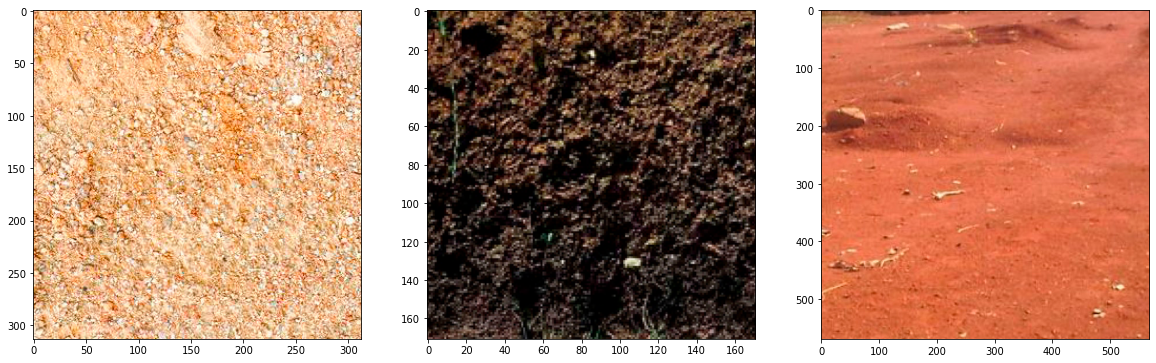

In [223]:
displayImg([data[9], data[170], data[223]])

In [224]:
resized_data = resize_images(data, (256, 256))
normalized_data = normalize_images(resized_data)

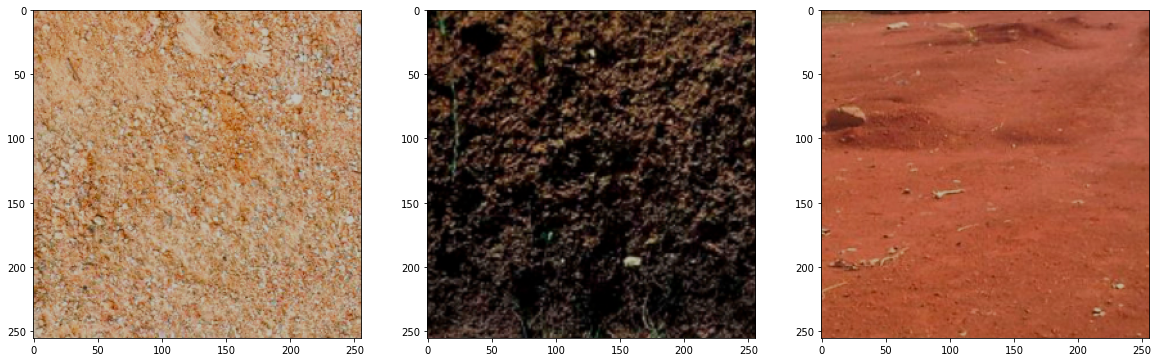

In [225]:
displayImg([normalized_data[9], normalized_data[170], normalized_data[223]])

In [226]:
segmentasi = []
for img in data:
    segmentasi.append(resultSegmentasi(img))

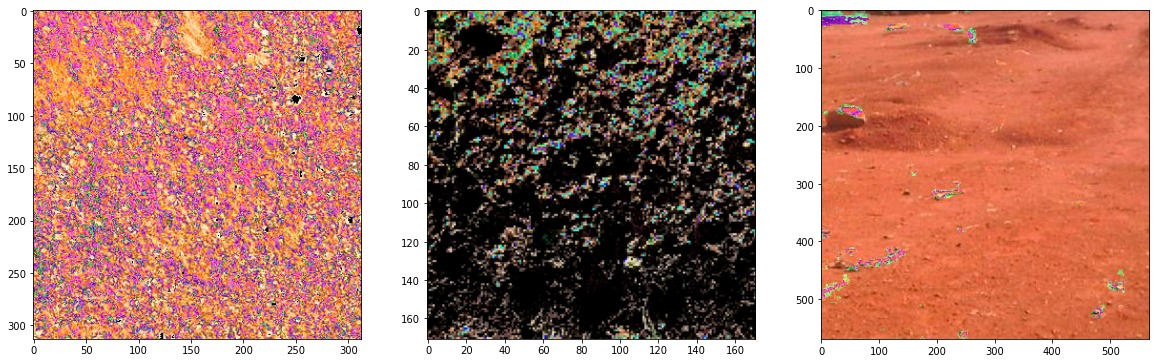

In [227]:
displayImg([segmentasi[9], segmentasi[170], segmentasi[223]])

In [228]:
imgErosi = []
for img in segmentasi:
   result = erosi(img)
   imgErosi.append(result)

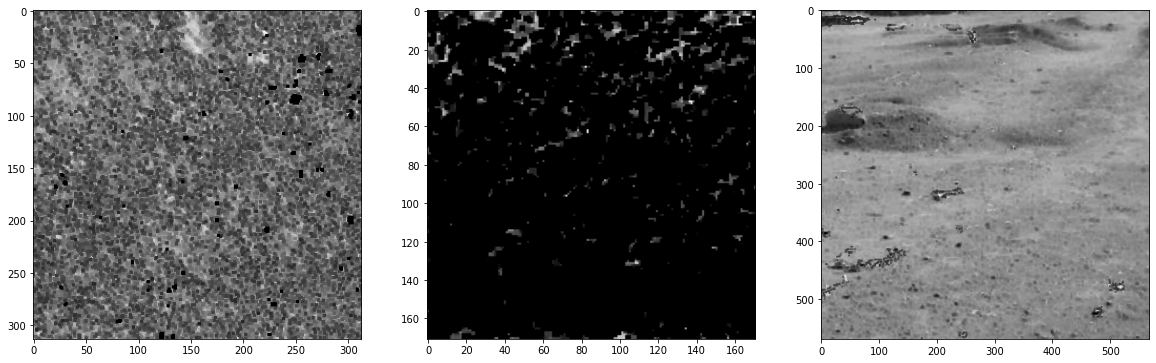

In [229]:
displayImg([imgErosi[9], imgErosi[170], imgErosi[223]])

In [230]:
masked = []
for i, mask in enumerate(imgErosi):
   img = normalized_data[i]
   mask = mask.astype(np.uint8)
   mask = cv2.resize(mask, (img.shape[1], img.shape[0]))
   result = cv2.bitwise_and(img, img, mask=mask)
   masked.append(result)

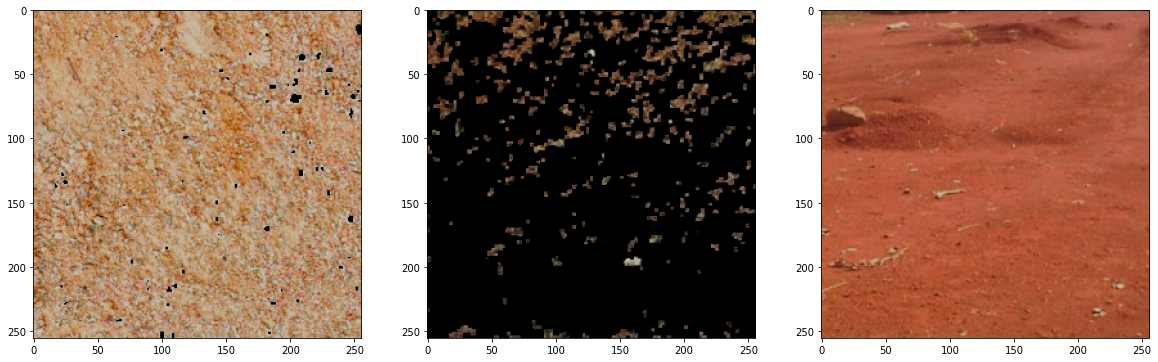

In [231]:
displayImg([masked[9], masked[170], masked[223]])

kode diatas merupakan kode untuk menampilkan hasil dari normalized_data

# GLCM

In [232]:
def derajat0 (img):

    max = np.max(img)

    imgTmp = np.zeros([max+1,max+1])

    for i in range (len(img)): 
        for j in range(len(img[i])-1): 

            imgTmp[img[i,j],img[i,j+1]] +=1

    transpos = np.transpose(imgTmp)

    data = imgTmp+transpos

    tmp = 0
    for i in range (len(data)):
        for j in range(len(data)):
            tmp+=data[i,j]

    for i in range(len(data)):
        for j in range(len(data)):
            data[i,j]/=tmp

    return data

def derajat45 (img):

    max = np.max(img)

    imgTmp=np.zeros([max+1,max+1])

    for i in range (len (img)-1):
        for j in range (len (img[i])-1):
            imgTmp[img[i+1,j],img[i,j+1]] += 1

    transpos= np.transpose(imgTmp)

    data= imgTmp+transpos

    tmp=0
    for i in range (len(data)):
        for j in range (len(data)):
            tmp+=data[i,j]

    for i in range (len (data)):
        for j in range (len (data)):
            data[i,j]/=tmp
    return data

def derajat90 (img):

    max = np.max(img)

    imgTmp=np.zeros([max+1,max+1])

    for i in range (len (img)-1):
        for j in range (len (img[i])):
            imgTmp[img[i+1,j],img[i,j]] += 1

    transpos= np.transpose(imgTmp)

    data= imgTmp+transpos

    tmp=0
    for i in range (len(data)):
        for j in range (len(data)):
            tmp+=data[i,j]

    for i in range (len (data)):
        for j in range (len (data)):
            data[i,j]/=tmp
    return data

def derajat135 (img):

    max = np.max(img)

    imgTmp=np.zeros([max+1,max+1])
    for i in range (len (img)-1):
        for j in range (len (img[i])-1):
            imgTmp[img[i,j],img[i+1,j+1]] += 1

    transpos= np.transpose(imgTmp)

    data= imgTmp+transpos

    tmp=0
    for i in range (len(data)):
        for j in range (len(data)):
            tmp+=data[i,j]

    for i in range (len (data)):
        for j in range (len (data)):
            data[i,j]/=tmp
    return data

Kode di atas adalah implementasi dari empat fungsi yang digunakan untuk menghitung matriks GLCM (Grey-Level Co-occurrence Matrix) pada empat arah yang berbeda (0 derajat, 45 derajat, 90 derajat, dan 135 derajat).

In [233]:
def dissimilarity(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):

            #rumus : p(x,y)+|i-j|
            simpan+= data2[i,j]+abs(i-j)
    #mengembalikan nilai var simpan
    return simpan

In [234]:
def ASM(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):

            #rumus : p(x,y)^2
            simpan+= pow(data2[i,j],2)
    #mengembalikan nilai var simpan
    return simpan

In [235]:
def contrast(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):

            #rumus : p(x,y)+(i-j)^2
            simpan+= data2[i,j]+pow(i-j,2)
    #mengembalikan nilai var simpan
    return simpan

In [236]:
def entropi(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range(len(data2)):
        for j in range(len(data2)):
            if data2[i,j] > 0:
                #rumus : -(p(x,y)*log^2(i-j)
                simpan+= -(data2[i,j] * math.log2(data2[i,j]))
    #mengembalikan nilai var simpan
    return simpan

In [237]:
def energy(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            #rumus : sqrt(p(x,y)^2) atau sqrt(ASM)
            simpan+=pow(data2[i,j],2)
    #mengembalikan nilai var simpan
    return simpan

In [238]:
def homogenitas(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            #rumus : p(x,y)/1+(i-j)^2
            simpan+=data2[i,j]/(1+pow((i-j),2))
    #mengembalikan nilai var simpan
    return simpan

In [239]:
def correlation(data2,mI,mJ,tI,tJ):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            simpan+=((i-mI)*(j-mJ)*data2[i,j])/(tI*tJ)
    #mengembalikan nilai var simpan
    return simpan

In [240]:
def meanI(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            simpan+= i * data2[i,j]
    #mengembalikan nilai var simpan
    return simpan

In [241]:
def meanJ(data2):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            simpan+= j * data2[i,j]
    #mengembalikan nilai var simpan
    return simpan

In [242]:
def taoI(data2,mI):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            simpan+= pow((i-mI),2)*data2[i,j]

    #mengakarkan var simpan
    simpan = math.sqrt(simpan)
    #mengembalikan nilai var simpan
    return simpan

In [243]:
def taoJ(data2,mJ):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data2)):
        for j in range(len(data2)):
            simpan+= pow((j-mJ),2)*data2[i,j]
    #mengakarkan var simpan
    simpan = math.sqrt(simpan)
    #mengembalikan nilai var simpan
    return simpan

In [244]:
hasil = []
for i in tqdm(range(len(masked)), desc='load'):
    dat = []
    dat.append(derajat0 (masked[i]))      #mencari piksel derajat0
    dat.append(derajat45 (masked[i]))     #mencari piksel derajat45
    dat.append(derajat90 (masked[i]))     #mencari piksel derajat90
    dat.append(derajat135 (masked[i]))    #mencari piksel derajat135
    hasil.append(dat)

load: 100%|██████████| 330/330 [10:53<00:00,  1.98s/it]


In [245]:
frame = []
indeks = 0 #digunakan untuk menentukan indeks dari nama filenya
for i in tqdm(hasil, desc='load'):
    save = []
    #untuk menginputkan nama dari file
    save.append(paths[indeks])
    indeks+=1
    for j in i:

        #memanggil fungsi energy
        en = energy(j)
        #menginputkan kedalam var save
        save.append(en)

        #memanggil fungsi homogenitas
        hm = homogenitas(j)
        #menginputkan kedalam var save
        save.append(hm)

        #memanggil fungsi entropi
        ent = entropi(j)
        #menginputkan kedalam var save
        save.append(ent)

        #memanggil fungsi contrast
        con = contrast(j)
        #menginputkan kedalam var save
        save.append(con)

        #memanggil fungsi dissimilarity
        dis = dissimilarity(j)
        #menginputkan kedalam var save
        save.append(dis)

        #memanggil fungsi ASM
        asm = ASM(j)
        #menginputkan kedalam var save
        save.append(asm)

        mI = meanI(j)
        mJ = meanJ(j)
        tI = taoI(j,mI)
        tJ = taoJ(j,mJ)

        #memanggil fungsi correlation
        cor = correlation(j,mI,mJ,tI,tJ)
        #menginputkan kedalam var save
        save.append(cor)

    #menginputkan isi var save ke var frame
    frame.append(save)

load: 100%|██████████| 330/330 [04:39<00:00,  1.18it/s]


In [246]:
#membuat var yang nantinya digunakan sebagai header
headerPass = ['path','energi0','homogenitas0','entropy0','contras0','dissimilarity0','ASM0','correlation0'
            ,'energi45','homogenitas45','entropy45','contras45','dissimilarity45','ASM45','correlation45'
            ,'energi90','homogenitas90','entropy90','contras90','dissimilarity90','ASM90','correlation90'
            ,'energi135','homogenitas135','entropy135','contras135','dissimilarity135','ASM135','correlation135']
#menginputkan var frame sebagai isi dari tabel
df = pd.DataFrame(frame, columns=headerPass)

In [247]:
df['labels'] = labels
df.to_csv(r'result.csv', index=False)